<a href="https://colab.research.google.com/github/Dima2865/SII_Labs/blob/main/SII_Lab1(football_summer_transfers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# импортируем библиотеку
import pandas as pd
# применим функцию read_csv() и посмотрим на первые три записи файла 2022_2023_football_summer_transfers.csv
transfers = pd.read_csv('/content/2022_2023_football_summer_transfers.csv')
transfers.head(3)


,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
0,Erling Haaland,Centre-Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60
1,Antony,Right Winger,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95
2,Wesley Fofana,Centre-Back,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80


In [60]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2000 non-null   object
 1   position      2000 non-null   object
 2   age           2000 non-null   object
 3   market_value  2000 non-null   object
 4   country_from  1999 non-null   object
 5   league_from   2000 non-null   object
 6   club_from     2000 non-null   object
 7   country_to    2000 non-null   object
 8   league_to     2000 non-null   object
 9   club_to       2000 non-null   object
 10  fee           2000 non-null   object
dtypes: object(11)
memory usage: 172.0+ KB


In [61]:
# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns

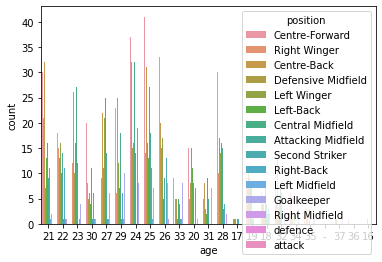

In [62]:
# посмотрим насколько значим класс билета для выживания пассажира
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'age', hue = 'position', data = transfers)

In [63]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество sum()
transfers.isnull().sum()

name            0
position        0
age             0
market_value    0
country_from    1
league_from     0
club_from       0
country_to      0
league_to       0
club_to         0
fee             0
dtype: int64

In [64]:
# удалим одну пустую строку в столбце country_from
transfers.dropna(inplace = True)

In [65]:
transfers.isnull().sum()

name            0
position        0
age             0
market_value    0
country_from    0
league_from     0
club_from       0
country_to      0
league_to       0
club_to         0
fee             0
dtype: int64

In [66]:
# применим one-hot encoding к переменной position с помощью метода .get_dummies()
pd.get_dummies(transfers['position']).head(3)

,Attacking Midfield,Central Midfield,Centre-Back,Centre-Forward,Defensive Midfield,Goalkeeper,Left Midfield,Left Winger,Left-Back,Right Midfield,Right Winger,Right-Back,Second Striker,attack,defence
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# удалим первый столбец, так как он избыточен
position = pd.get_dummies(transfers['position'], drop_first = True)
position.head(3)

,Central Midfield,Centre-Back,Centre-Forward,Defensive Midfield,Goalkeeper,Left Midfield,Left Winger,Left-Back,Right Midfield,Right Winger,Right-Back,Second Striker,attack,defence
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
transfers = transfers.loc[transfers['age'] != '-']

In [69]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создадим объект этого класса
scaler = StandardScaler()
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['age']
# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(transfers[cols_to_scale])

# применим их
transfers[cols_to_scale] = scaler.transform(transfers[cols_to_scale])
# посмотрим на результат
transfers.head(3)


,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
0,Erling Haaland,Centre-Forward,-1.083598,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60
1,Antony,Right Winger,-0.824592,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95
2,Wesley Fofana,Centre-Back,-1.083598,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80


In [70]:
position['Age'] = transfers['age']

In [71]:
position.head(3)

,Central Midfield,Centre-Back,Centre-Forward,Defensive Midfield,Goalkeeper,Left Midfield,Left Winger,Left-Back,Right Midfield,Right Winger,Right-Back,Second Striker,attack,defence,Age
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.083598
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.824592
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.083598


In [72]:
train = pd.concat([transfers, position], axis = 1)

In [73]:
transfers.drop(['country_from', 'country_to', 'position', 'market_value'], axis = 1, inplace = True)
transfers.head(3)

,name,age,league_from,club_from,league_to,club_to,fee
0,Erling Haaland,-1.083598,Bundesliga,Borussia Dortmund,Premier League,Manchester City,60
1,Antony,-0.824592,Eredivisie,Ajax Amsterdam,Premier League,Manchester United,95
2,Wesley Fofana,-1.083598,Premier League,Leicester City,Premier League,Chelsea FC,80


In [75]:
transfers.columns

Index(['name', 'age', 'league_from', 'club_from', 'league_to', 'club_to',
       'fee'],
      dtype='object')

In [76]:
position.columns

Index(['Central Midfield', 'Centre-Back', 'Centre-Forward',
       'Defensive Midfield', 'Goalkeeper', 'Left Midfield', 'Left Winger',
       'Left-Back', 'Right Midfield', 'Right Winger', 'Right-Back',
       'Second Striker', 'attack', 'defence', 'Age'],
      dtype='object')

In [77]:
position.columns = position.columns.map(str)

In [78]:
# поместим в X_train все кроме столбца Goalkeeper
X_train = position.drop('Goalkeeper', axis = 1)
# столбец 'Goalkeeper' станет нашей целевой переменной (y_train)
y_train = position['Goalkeeper']

X_train.head(3)

,Central Midfield,Centre-Back,Centre-Forward,Defensive Midfield,Left Midfield,Left Winger,Left-Back,Right Midfield,Right Winger,Right-Back,Second Striker,attack,defence,Age
0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1.083598
1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.824592
2,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.083598


In [86]:
X_train['Age'] = X_train['Age'].fillna(0)

In [87]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
# обучим нашу модель
model.fit(X_train, y_train)

LogisticRegression()

LogisticRegression()

In [88]:
y_pred_train = model.predict(X_train)

In [89]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)
# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

# 0 - не голкипер

,0,1
0,1897,0
1,98,4


In [90]:
#Для удобства интерпретации добавим подписи.
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз - не голкипер', 'Прогноз - голкипер'], index = ['Факт - не голкипер', 'Факт - голкипер'])

In [91]:
conf_matrix_labels

,Прогноз - не голкипер,Прогноз - голкипер
Факт - не голкипер,1897,0
Факт - голкипер,98,4


In [92]:
# рассчитаем метрику accuracy вручную
round((1897 + 4)/(1897 + 4 + 0 + 98), 3)


0.951

In [93]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score
# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)
# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.951

In [106]:
test = pd.read_csv('/content/2022_2023_football_summer_transfers.csv')
test.head(3)

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee
0,Erling Haaland,Centre-Forward,21,150,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60
1,Antony,Right Winger,22,35,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95
2,Wesley Fofana,Centre-Back,21,40,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80


In [107]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2000 non-null   object
 1   position      2000 non-null   object
 2   age           2000 non-null   object
 3   market_value  2000 non-null   object
 4   country_from  1999 non-null   object
 5   league_from   2000 non-null   object
 6   club_from     2000 non-null   object
 7   country_to    2000 non-null   object
 8   league_to     2000 non-null   object
 9   club_to       2000 non-null   object
 10  fee           2000 non-null   object
dtypes: object(11)
memory usage: 172.0+ KB


In [108]:
# для начала дадим датасету привычное название X_test
X_test = test

In [109]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество sum()
X_test.isnull().sum()

name            0
position        0
age             0
market_value    0
country_from    1
league_from     0
club_from       0
country_to      0
league_to       0
club_to         0
fee             0
dtype: int64

In [115]:
# удалим одну пустую строку в столбце country_from
X_test.dropna(inplace = True)

# применим one-hot encoding к переменной position с помощью метода .get_dummies()
pd.get_dummies(X_test['position'])
# удалим первый столбец, так как он избыточен
position2 = pd.get_dummies(X_test['position'], drop_first = True)
position2.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Central Midfield,Centre-Back,Centre-Forward,Defensive Midfield,Goalkeeper,Left Midfield,Left Winger,Left-Back,Right Midfield,Right Winger,Right-Back,Second Striker,attack,defence
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
X_test = X_test.loc[X_test['age'] != '-']

In [120]:
position2['age'] = X_test['age']

In [121]:
# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['age']

scaler.fit(position2[cols_to_scale])

position2[cols_to_scale] = scaler.transform(position2[cols_to_scale])
position2.head(3)

,Central Midfield,Centre-Back,Centre-Forward,Defensive Midfield,Goalkeeper,Left Midfield,Left Winger,Left-Back,Right Midfield,Right Winger,Right-Back,Second Striker,attack,defence,age
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.083598
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.824592
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1.083598


In [127]:
#Превращаем название столбцов в строки 
position2.columns = position2.columns.map(str)

In [128]:
X_tray = position2.drop('Goalkeeper', axis = 1)

In [129]:
y_pred_test = model.predict(X_tray)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
Feature names seen at fit time, yet now missing:
- Age

  warnings.warn(message, FutureWarning)


In [130]:
y_pred_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [132]:
# возьмем индекс пассажиров из столбца position тестовой выборки
ids = test['positions']
# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это роль футболиста, вторая - прогноз "на тесте"
result = pd.DataFrame({'position': ids, 'Goalkeeper': y_pred_test})
# посмотрим, что получилось
result.head(4)

ValueError: ignored

In [ ]:
position2.head(50)

In [137]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
position2.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


In [138]:
# применим метод .download() объекта files
files.download('/content/result.csv')

NameError: ignored